In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [27]:
import pandas as pd
data = pd.read_csv("exchange_rate.csv")
data.head()


,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [28]:
data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data.set_index('date', inplace=True)


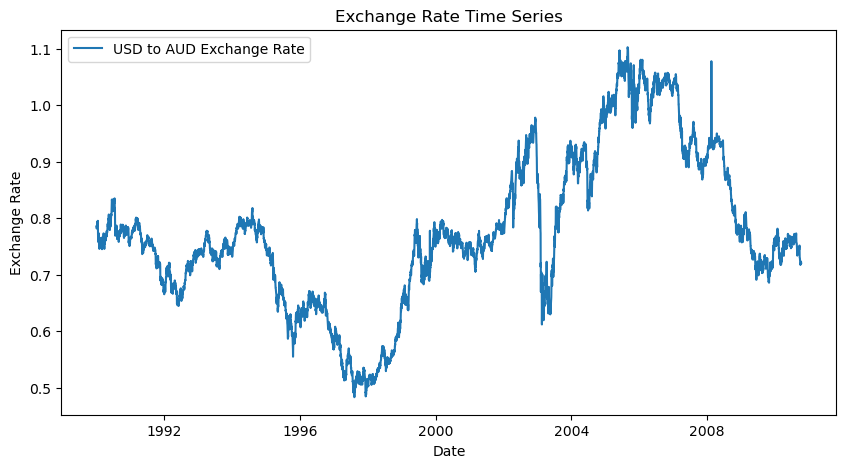

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data, label='USD to AUD Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [30]:
data.isnull().sum()


Ex_rate    0
dtype: int64

In [31]:
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]


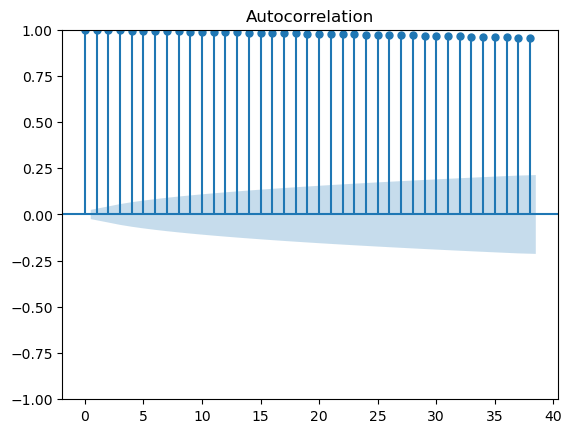

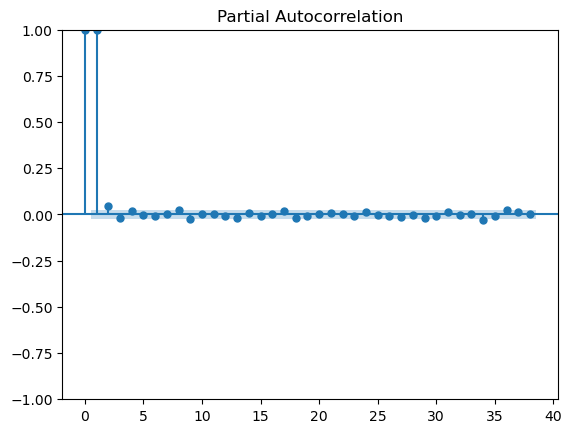

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train)
plt.show()

plot_pacf(train)
plt.show()


In [33]:
p = 1
d = 1
q = 1



In [34]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()
print(arima_fit.summary())


C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(1, 1, 1)   Log Likelihood               22719.046
Date:                Mon, 29 Dec 2025   AIC                         -45432.092
Time:                        12:43:50   BIC                         -45411.959
Sample:                    01-01-1990   HQIC                        -45425.104
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5972      0.062     -9.648      0.000      -0.719      -0.476
ma.L1          0.5398      0.064      8.430      0.000       0.414       0.665
sigma2      3.281e-05   1.95e-07    168.198      0.0

In [35]:
arima_forecast = arima_fit.forecast(steps=len(test))


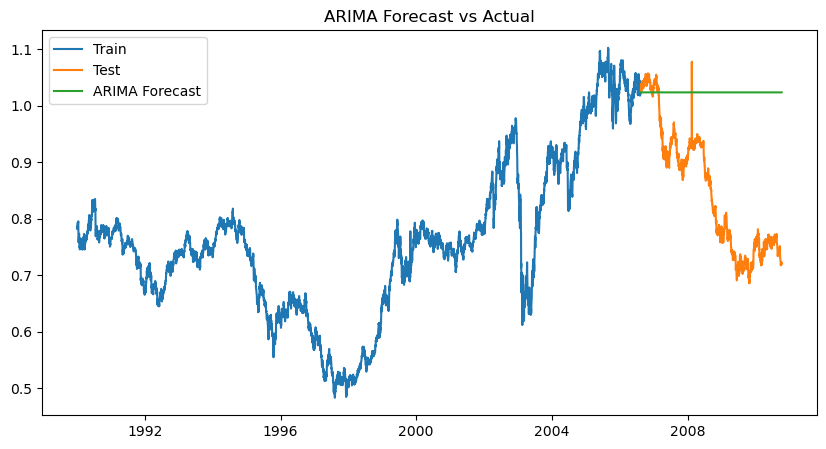

In [36]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()


In [37]:
residuals = arima_fit.resid


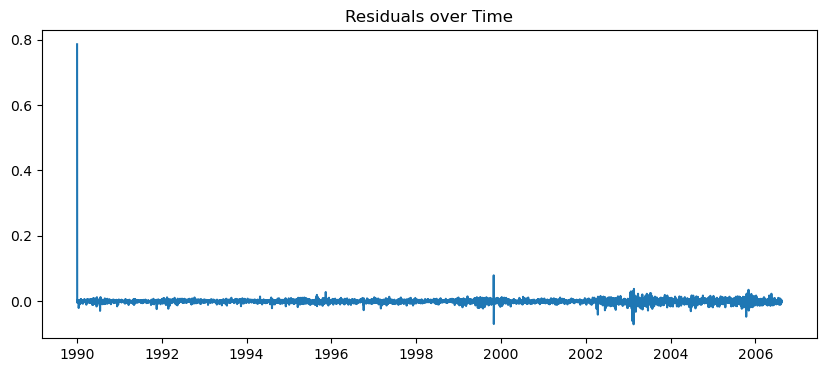

In [38]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals over Time')
plt.show()


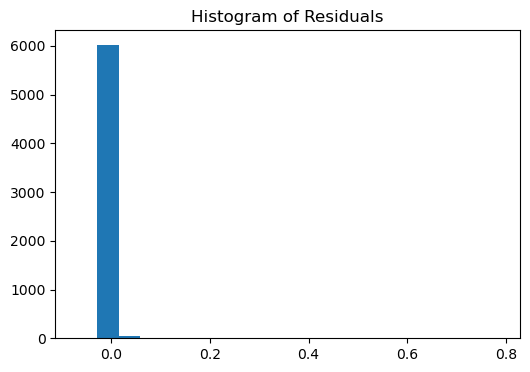

In [39]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.show()


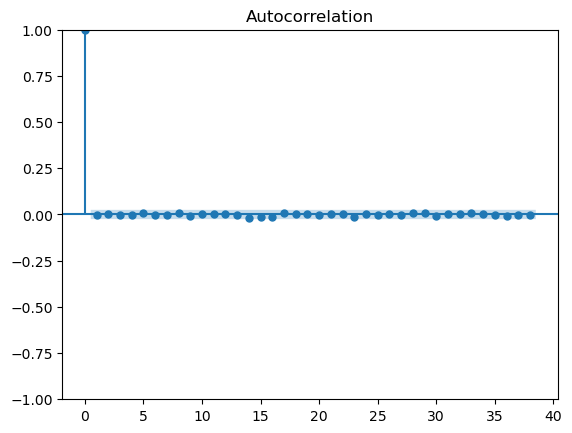

In [40]:
plot_acf(residuals)
plt.show()


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

arima_forecast = pd.Series(arima_forecast, index=test.index)



In [42]:
arima_mae = mean_absolute_error(test.values, arima_forecast.values)

arima_rmse = np.sqrt(
    mean_squared_error(test.values, arima_forecast.values)
)

arima_mape = np.mean(
    np.abs((test.values - arima_forecast.values) / test.values)
) * 100

print("ARIMA MAE:", arima_mae)
print("ARIMA RMSE:", arima_rmse)
print("ARIMA MAPE:", arima_mape)


ARIMA MAE: 0.17770970449120707
ARIMA RMSE: 0.20543669659668565
ARIMA MAPE: 22.79797015332956


In [43]:
es_model = ExponentialSmoothing(train, trend='add', seasonal=None)
es_fit = es_model.fit()


C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [44]:
es_forecast = es_fit.forecast(len(test))


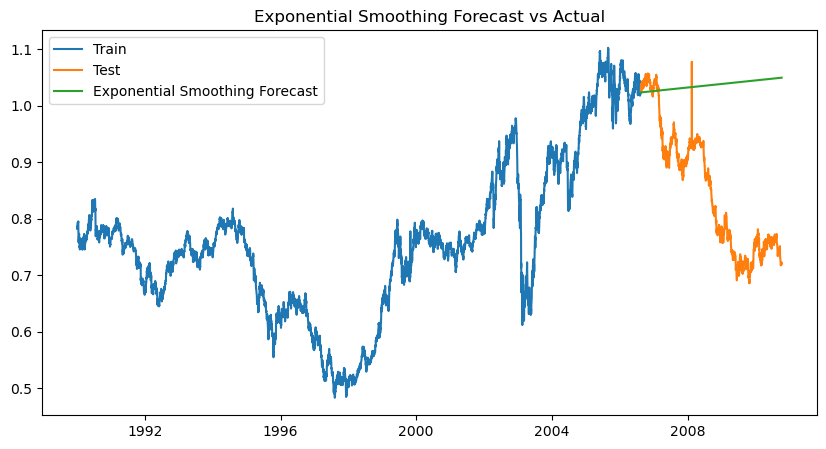

In [45]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, es_forecast, label='Exponential Smoothing Forecast')
plt.legend()
plt.title('Exponential Smoothing Forecast vs Actual')
plt.show()


In [46]:
es_mae = mean_absolute_error(test, es_forecast)
es_rmse = np.sqrt(mean_squared_error(test, es_forecast))
es_mape = np.mean(np.abs((test - es_forecast) / test)) * 100

print("ES MAE:", es_mae)
print("ES RMSE:", es_rmse)
print("ES MAPE:", es_mape)


ES MAE: 0.19027436194560823
ES RMSE: 0.22008623040234462
ES MAPE: nan


In [47]:
comparison = pd.DataFrame({
    'Model': ['ARIMA', 'Exponential Smoothing'],
    'MAE': [arima_mae, es_mae],
    'RMSE': [arima_rmse, es_rmse],
    'MAPE': [arima_mape, es_mape]
})

comparison


,Model,MAE,RMSE,MAPE
0,ARIMA,0.177710,0.205437,22.79797
1,Exponential Smoothing,0.190274,0.220086,NaN


In [48]:
#Conclusion:

#In this study, time series forecasting was performed on historical exchange rate data using ARIMA and Exponential Smoothing models. 
#The ARIMA model was validated using residual diagnostics, which confirmed the absence of autocorrelation and randomness of residuals.
#Both models were evaluated using MAE, RMSE, and MAPE. Based on the comparison, the model with lower error values demonstrated better forecasting performance.
#This analysis highlights the importance of model evaluation and comparison in time series forecasting.
